In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [3]:
class MeraLR:
    def __init__(self):
        self.m = None
        self.b = None
    def fit(self , X_train,Y_train):
        num = 0
        den = 0
        for i in range(X_train.shape[0]):
            num += (X_train[i] - np.mean(X_train)) * (Y_train[i] - np.mean(Y_train))
            den += (X_train[i] - np.mean(X_train)) ** 2
        self.m = num / den
        self.b = np.mean(Y_train) - self.m * np.mean(X_train)
        print(f"m = {self.m}, b = {self.b}")
    def predict(self , X_test):
        print(X_test)
        return self.m * X_test + self.b

In [4]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
X = df.iloc[:, 0].values
y = df.iloc[:, 1].values

In [6]:
X

array([6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09, 8.31, 5.32,
       6.61, 8.94, 6.93, 7.73, 7.25, 6.84, 5.38, 6.94, 7.48, 7.28, 6.85,
       6.14, 6.19, 6.53, 7.28, 8.31, 5.42, 5.94, 7.15, 7.36, 8.1 , 6.96,
       6.35, 7.34, 6.87, 5.99, 5.9 , 8.62, 7.43, 9.38, 6.89, 5.95, 7.66,
       5.09, 7.87, 6.07, 5.84, 8.63, 8.87, 9.58, 9.26, 8.37, 6.47, 6.86,
       8.2 , 5.84, 6.6 , 6.92, 7.56, 5.61, 5.48, 6.34, 9.16, 7.36, 7.6 ,
       5.11, 6.51, 7.56, 7.3 , 5.79, 7.47, 7.78, 8.44, 6.85, 6.97, 6.94,
       8.99, 6.59, 7.18, 7.63, 6.1 , 5.58, 8.44, 4.26, 4.79, 7.61, 8.09,
       4.73, 6.42, 7.11, 6.22, 7.9 , 6.79, 5.83, 6.63, 7.11, 5.98, 7.69,
       6.61, 7.95, 6.71, 5.13, 7.05, 7.62, 6.66, 6.13, 6.33, 7.76, 7.77,
       8.18, 5.42, 8.58, 6.94, 5.84, 8.35, 9.04, 7.12, 7.4 , 7.39, 5.23,
       6.5 , 5.12, 5.1 , 6.06, 7.33, 5.91, 6.78, 7.93, 7.29, 6.68, 6.37,
       5.84, 6.05, 7.2 , 6.1 , 5.64, 7.14, 7.91, 7.19, 7.91, 6.76, 6.93,
       4.85, 6.17, 5.84, 6.07, 5.66, 7.57, 8.28, 6.

In [7]:
y

array([3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6 , 2.48, 2.31, 3.51, 1.86,
       2.6 , 3.65, 2.89, 3.42, 3.23, 2.35, 2.09, 2.98, 2.83, 3.16, 2.93,
       2.3 , 2.48, 2.71, 3.65, 3.42, 2.16, 2.24, 3.49, 3.26, 3.89, 3.08,
       2.73, 3.42, 2.87, 2.84, 2.43, 4.36, 3.33, 4.02, 2.7 , 2.54, 2.76,
       1.86, 3.58, 2.26, 3.26, 4.09, 4.62, 4.43, 3.79, 4.11, 2.61, 3.09,
       3.39, 2.74, 1.94, 3.09, 3.31, 2.19, 1.61, 2.09, 4.25, 2.92, 3.81,
       1.63, 2.89, 2.99, 2.94, 2.35, 3.34, 3.62, 4.03, 3.44, 3.28, 3.15,
       4.6 , 2.21, 3.  , 3.44, 2.2 , 2.17, 3.49, 1.53, 1.48, 2.77, 3.55,
       1.48, 2.72, 2.66, 2.14, 4.  , 3.08, 2.42, 2.79, 2.61, 2.84, 3.83,
       3.24, 4.14, 3.52, 1.37, 3.  , 3.74, 2.82, 2.19, 2.59, 3.54, 4.06,
       3.76, 2.25, 4.1 , 2.37, 1.87, 4.21, 3.33, 2.99, 2.88, 2.65, 1.73,
       3.02, 2.01, 2.3 , 2.31, 3.16, 2.6 , 3.11, 3.34, 3.12, 2.49, 2.01,
       2.48, 2.58, 2.83, 2.6 , 2.1 , 3.13, 3.89, 2.4 , 3.15, 3.18, 3.04,
       1.54, 2.42, 2.18, 2.46, 2.21, 3.4 , 3.67, 2.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(160,)

In [9]:
lr =MeraLR()

In [10]:
lr.fit(X_train,y_train)

m = 0.5742564727019197, b = -1.0270069374542108


In [11]:
X_train.shape[0]

160

In [12]:
X_train[0]

np.float64(7.18)

In [13]:
X_train.mean()

np.float64(7.005375000000001)

In [14]:
X_test[0]

np.float64(6.63)

In [15]:
print(lr.predict(X_test[0]))

6.63
2.7803134765595168


In [20]:
def predict_package():
    try:
        cgpa = float(entry_cgpa.get())
        predicted_package = lr.predict([[cgpa]])[0]
        label_result.config(text=f"Predicted Package: {predicted_package[0]}")
    except ValueError:
        label_result.config(text="Invalid input. Please enter a valid CGPA.")


In [21]:
root = tk.Tk()
root.title('Placement Package Predictor')
root.geometry('800x400')

''

[7.18 7.21 8.62 6.53 5.12 6.93 7.15 7.48 4.85 7.61 5.84 6.75 7.89 5.91
 7.12 8.44 7.91 7.69 6.93 7.11 9.31 5.98 8.1  8.94 6.87 7.39 5.95 8.11
 7.11 5.64 9.26 6.78 5.53 6.89 7.4  6.94 8.31 7.19 7.95 5.42 7.82 8.99
 6.07 6.26 7.28 4.79 7.3  5.99 6.19 5.48 6.14 6.76 6.71 6.35 6.61 7.89
 8.71 6.73 5.42 5.23 6.94 6.96 6.93 5.84 7.77 6.17 5.32 6.34 8.58 6.07
 8.6  6.89 7.63 7.94 5.79 5.1  7.36 5.09 8.93 5.94 9.38 7.76 6.98 7.38
 7.28 6.19 7.88 5.66 6.1  7.43 8.65 5.84 5.83 7.08 7.66 7.91 7.42 6.66
 6.47 6.05 6.19 8.15 6.31 8.87 7.63 7.34 6.75 8.18 6.22 8.44 6.29 8.22
 6.42 6.09 6.93 7.56 8.01 6.37 5.38 7.78 7.04 7.2  8.13 7.28 9.16 6.86
 6.33 9.58 5.89 6.92 8.63 4.73 6.85 6.6  7.13 8.25 7.29 5.9  6.47 4.57
 5.12 8.37 8.28 6.68 6.12 7.05 6.61 9.04 8.09 6.85 6.5  6.22 7.28 7.35
 7.47 6.13 7.73 7.9  7.14 5.13]


Text(0, 0.5, 'Package(in LPA)')

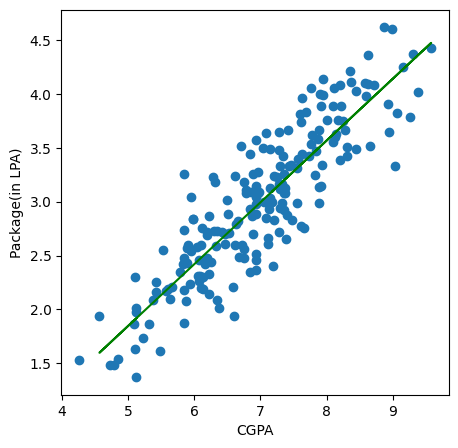

In [22]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color='green')
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

In [23]:
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH, expand=1)

frame_right = tk.Frame(root)
frame_right.pack(side=tk.LEFT, padx=20)
label_cgpa = tk.Label(frame_right, text='Enter CGPA : ')
label_cgpa.pack()
entry_cgpa = tk.Entry(frame_right)
entry_cgpa.pack()
btn_predict = tk.Button(frame_right, text='Predict', command=predict_package)
btn_predict.pack()
label_predicted = tk.Label(frame_right, text='Predicted Package : ')
label_predicted.pack()
root.mainloop()

[[7.0]]


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Ayaan\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Ayaan\AppData\Local\Temp\ipykernel_2604\4031503295.py", line 4, in predict_package
    predicted_package = lr.predict([[cgpa]])[0]
                        ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ayaan\AppData\Local\Temp\ipykernel_2604\2949408928.py", line 16, in predict
    return self.m * X_test + self.b
           ~~~~~~~^~~~~~~~
TypeError: can't multiply sequence by non-int of type 'numpy.float64'


[[8.7]]


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Ayaan\AppData\Local\Programs\Python\Python312\Lib\tkinter\__init__.py", line 1968, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Ayaan\AppData\Local\Temp\ipykernel_2604\4031503295.py", line 4, in predict_package
    predicted_package = lr.predict([[cgpa]])[0]
                        ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ayaan\AppData\Local\Temp\ipykernel_2604\2949408928.py", line 16, in predict
    return self.m * X_test + self.b
           ~~~~~~~^~~~~~~~
TypeError: can't multiply sequence by non-int of type 'numpy.float64'
